# Supply Chain Analytics Final Project

#Group 10

1.  Siddhesh D. Munagekar :0747944
2.  Chaitanya M V : 0749773
3.  Sharwat Jahan : 0747375
3.  Shashank Raj Menta :0749155
4.  Trisha Manishbhai Patel:0748716

In [1]:
from google.colab import drive
drive.mount('/content/Mydrive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


##  Important insights of this analysis can also be found on our application:
https://share.streamlit.io/siddheshdmunagekar/supplychain/main/air_quality.py 

In [2]:
df= pd.read_excel('/content/Mydrive/MyDrive/Supply Chain Analytics/Final_Project/AirQualityUCI.xlsx',parse_dates=True)
df.isnull().sum()
df.drop('Time',axis=1)
df=df.groupby('Date').mean()
df=df.rename(columns={'CO(GT)':'Carbon_monoxide','PT08.S1(CO)':'Tin_oxide','NMHC(GT)':'Non_methane_hydrocarbons','C6H6(GT)':'Benzene',
                   'PT08.S2(NMHC)':'titania','NOx(GT)':'Nitric_oxide','PT08.S3(NOx)':'tungsten_oxide_NO','NO2(GT)':'Nitrogen_dioxide',
                  'PT08.S4(NO2)':'tungsten_oxide_NO2','PT08.S5(O3)':'indium_oxide' }, inplace=False)
df

,Carbon_monoxide,Tin_oxide,Non_methane_hydrocarbons,Benzene,titania,Nitric_oxide,tungsten_oxide_NO,Nitrogen_dioxide,tungsten_oxide_NO2,indium_oxide,T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10,1.966667,1316.500000,86.500000,8.460790,912.250000,132.000000,1167.250000,108.833333,1545.333333,1096.041667,12.020833,54.883334,0.765626
2004-03-11,-6.187500,1244.062500,104.500000,7.989058,851.802083,130.041667,1277.187500,87.375000,1522.697917,885.031250,9.833333,64.069791,0.775768
2004-03-12,-14.095833,1281.562500,141.500000,12.129509,1008.229167,142.583333,1101.718750,89.916667,1627.218750,1084.218750,11.292708,51.107292,0.663102
2004-03-13,-5.750000,1330.555556,139.250000,10.922887,992.822917,168.416667,993.159722,105.583333,1595.621528,1245.781250,12.866319,51.530903,0.732294
2004-03-14,-5.966667,1360.927083,116.958333,9.631442,943.854167,132.166667,1001.104167,97.458333,1602.187500,1234.177083,16.016667,48.843750,0.849674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-03-31,1.387500,1007.989583,-200.000000,5.226496,749.302083,184.991667,795.479167,100.637500,1176.468750,763.770833,17.554167,50.092708,0.951922
2005-04-01,-7.270833,903.142361,-200.000000,3.416610,662.871528,161.766667,946.732639,107.208333,943.006944,523.868056,15.919792,35.959722,0.636536
2005-04-02,0.854167,890.895833,-200.000000,2.527522,616.197917,142.370833,991.697917,100.079167,864.260417,481.614583,15.489583,32.213542,0.546161


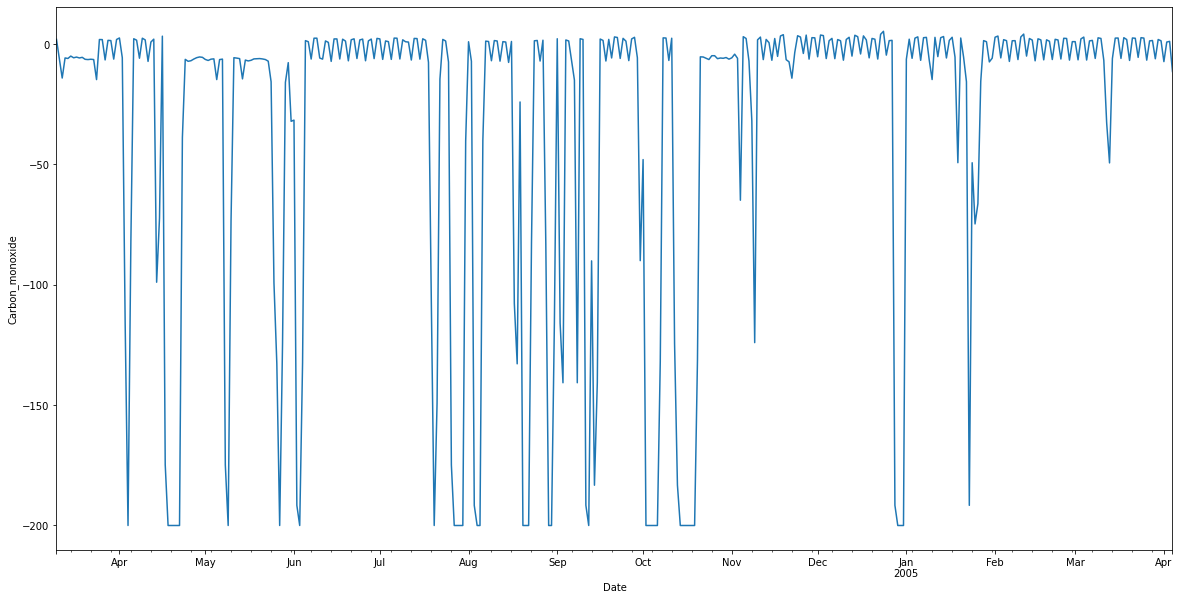

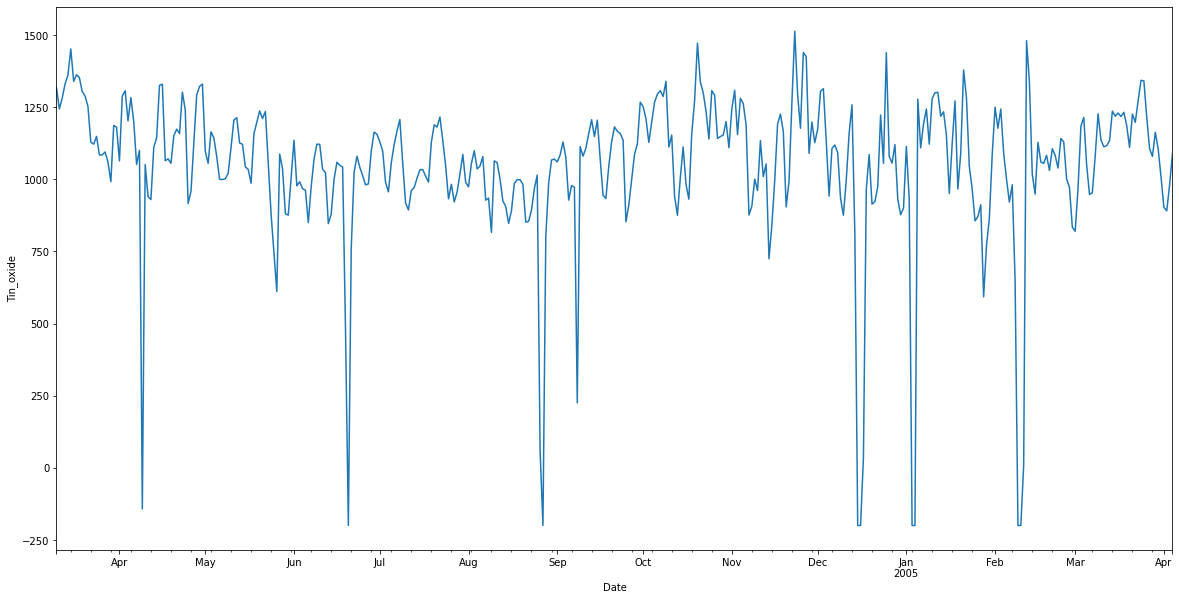

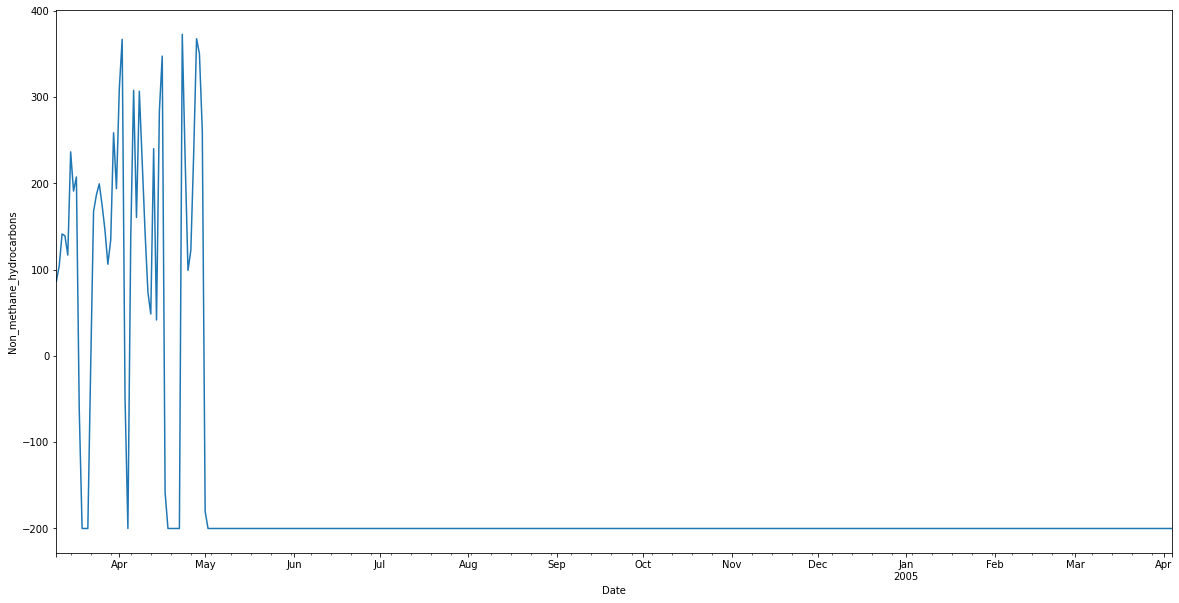

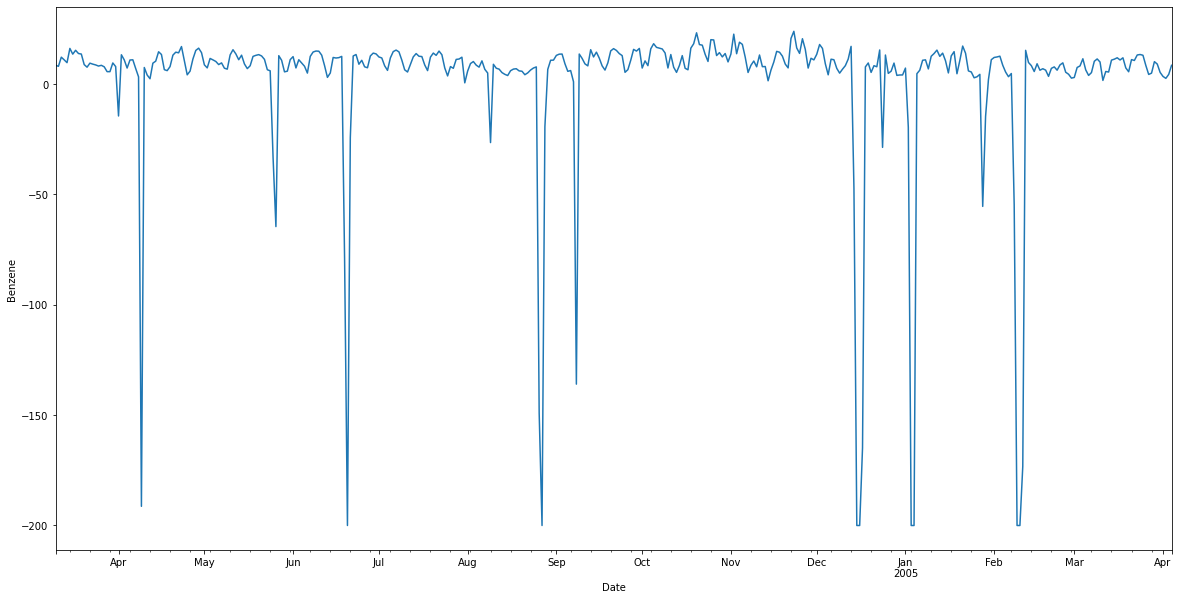

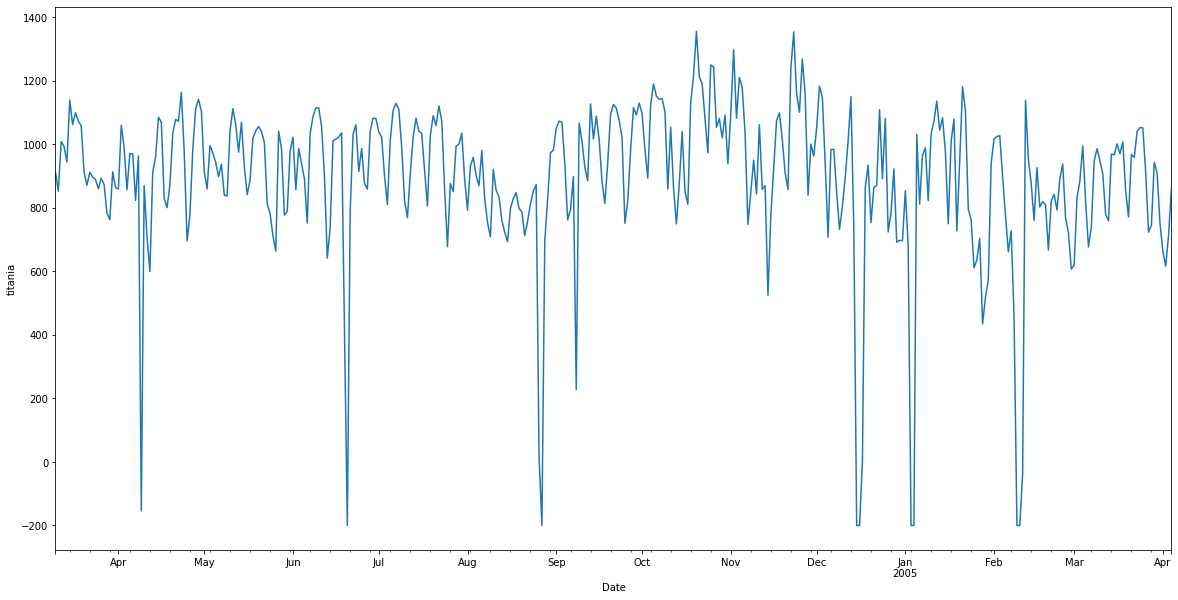

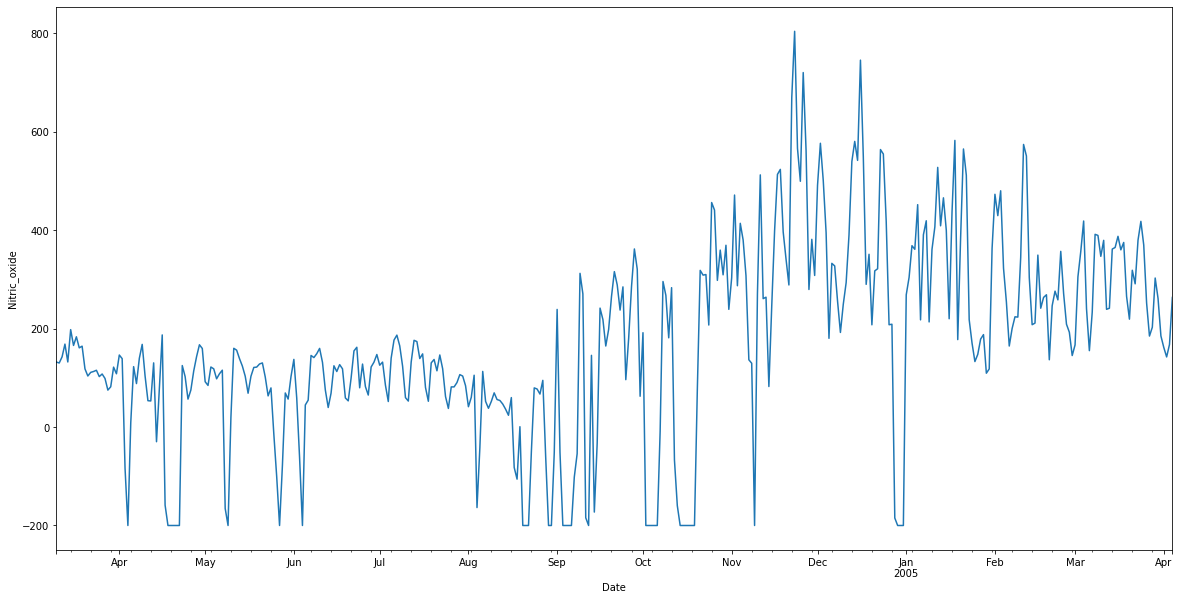

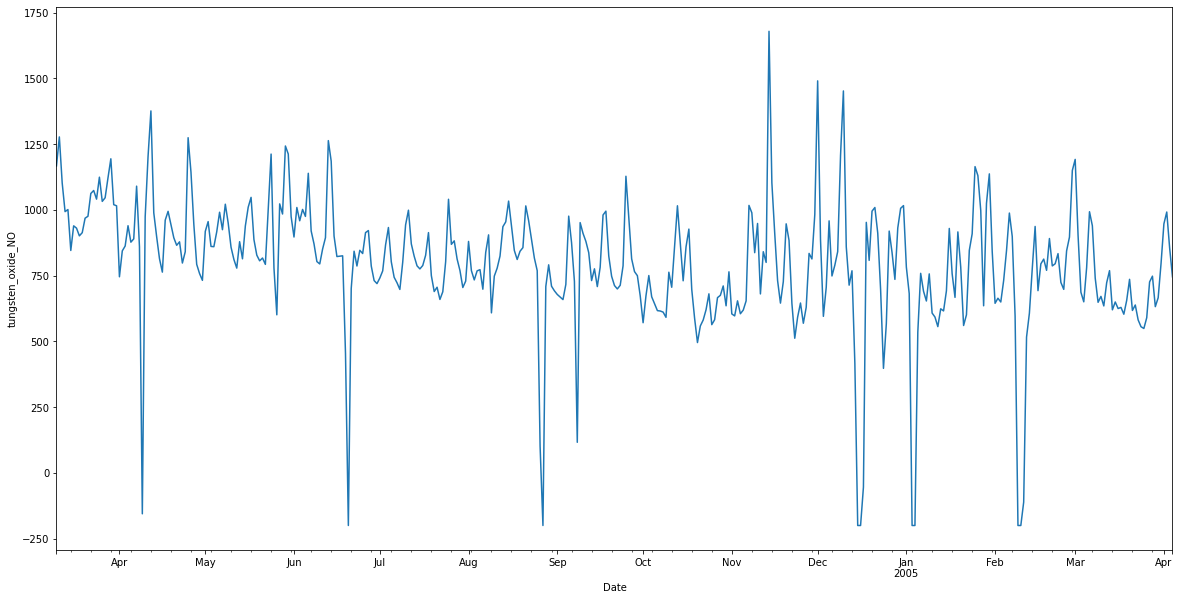

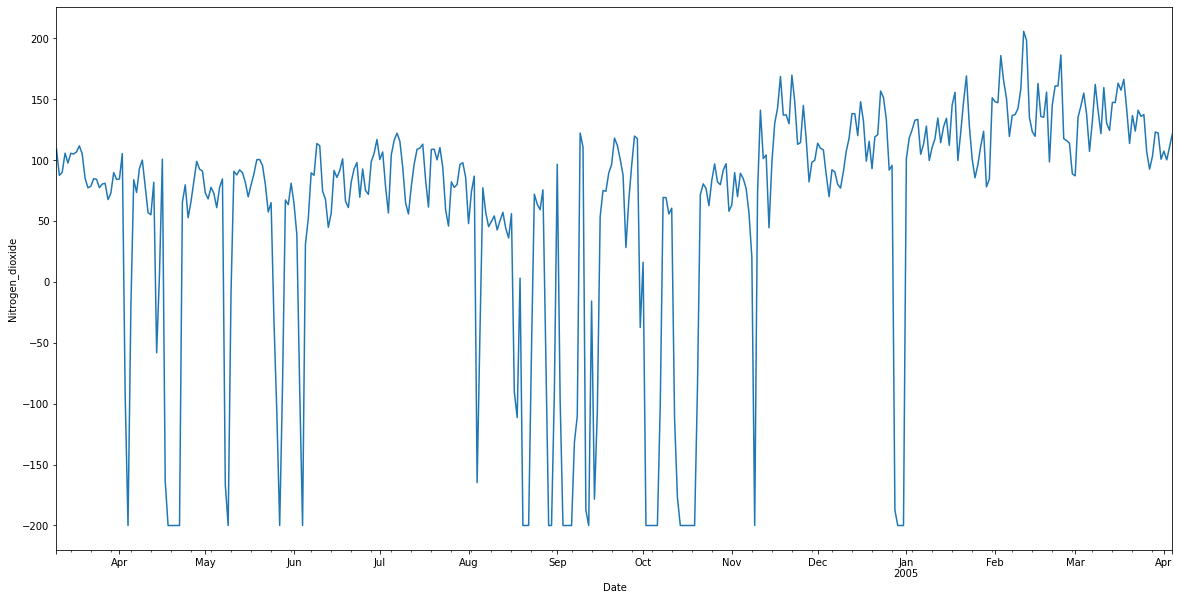

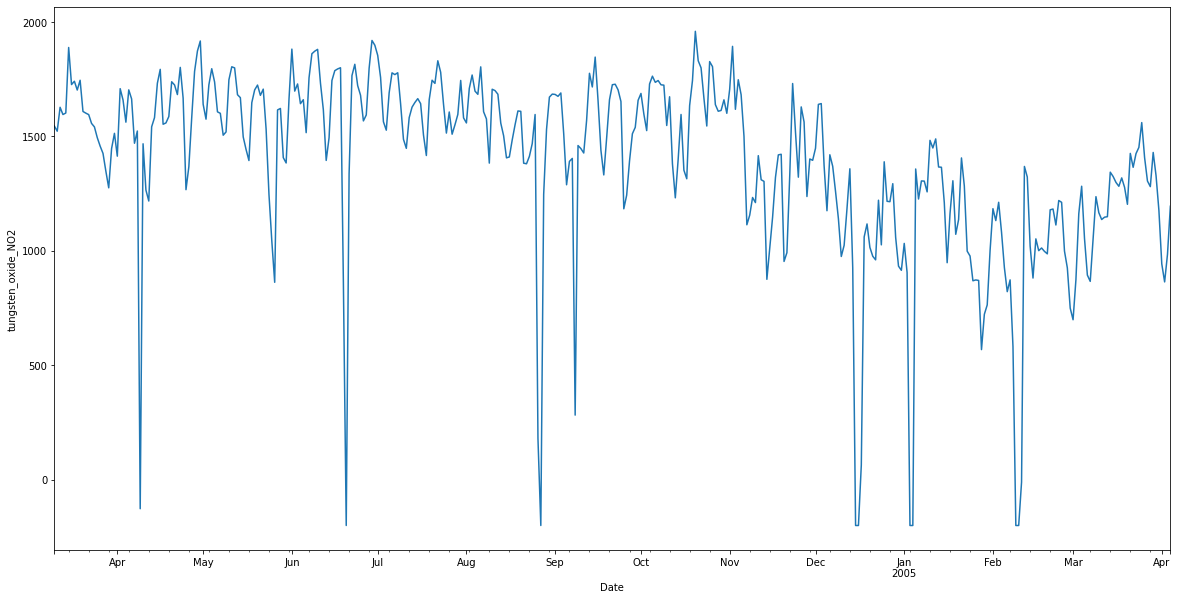

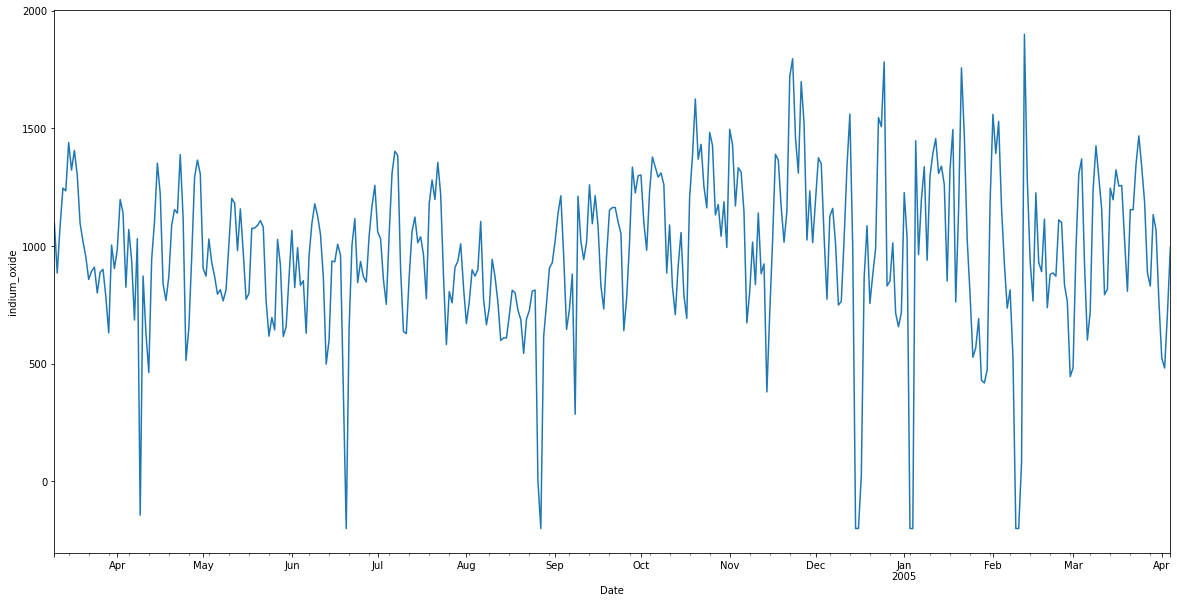

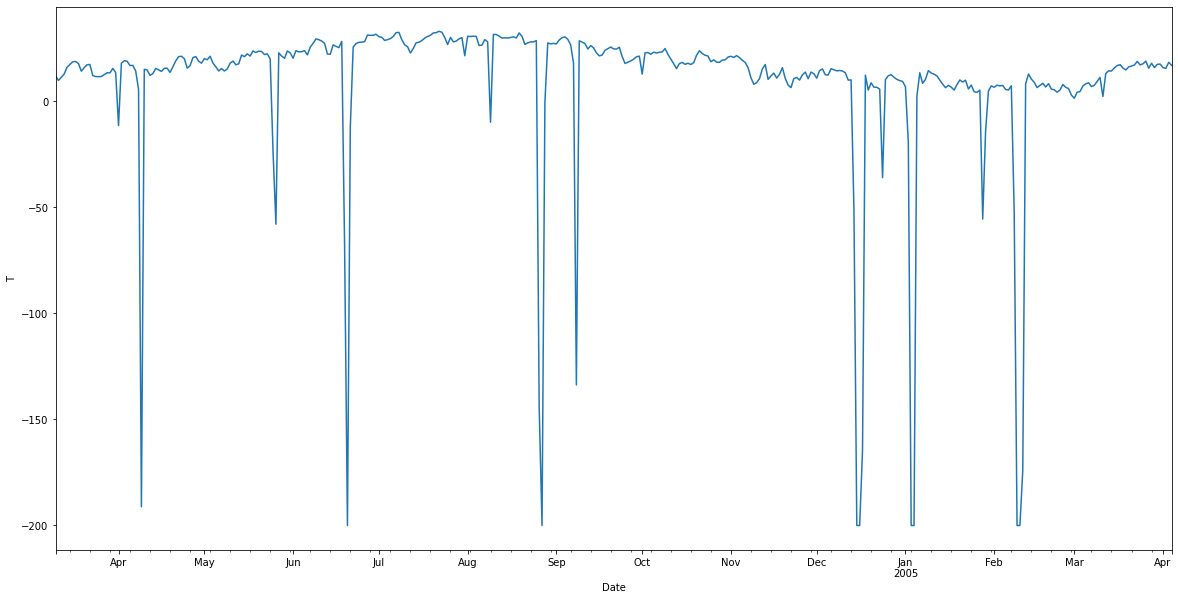

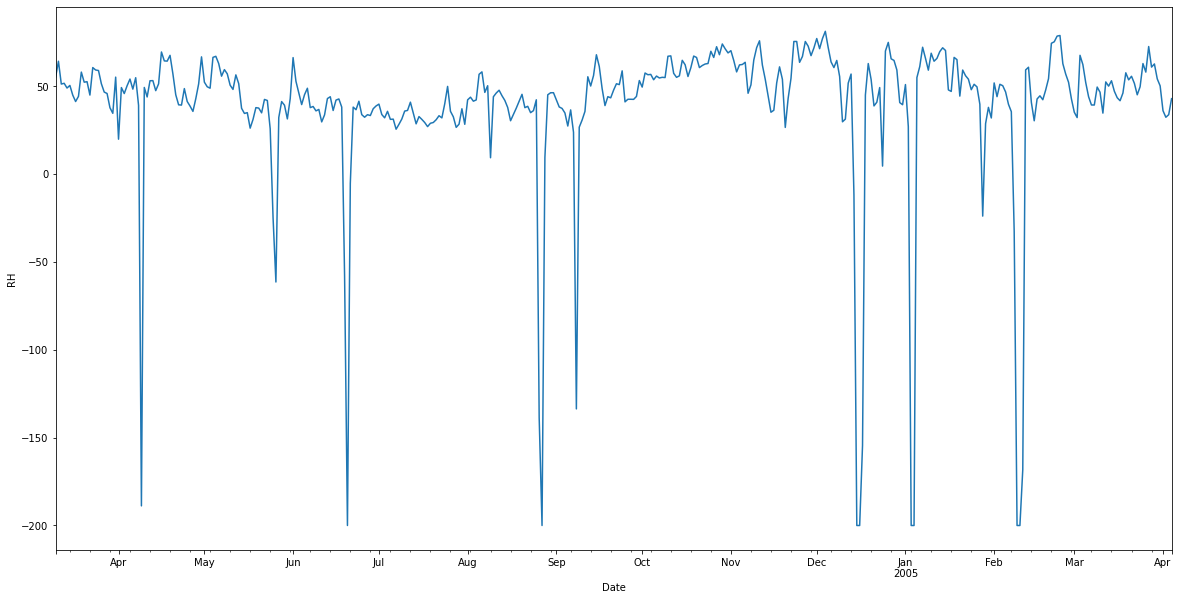

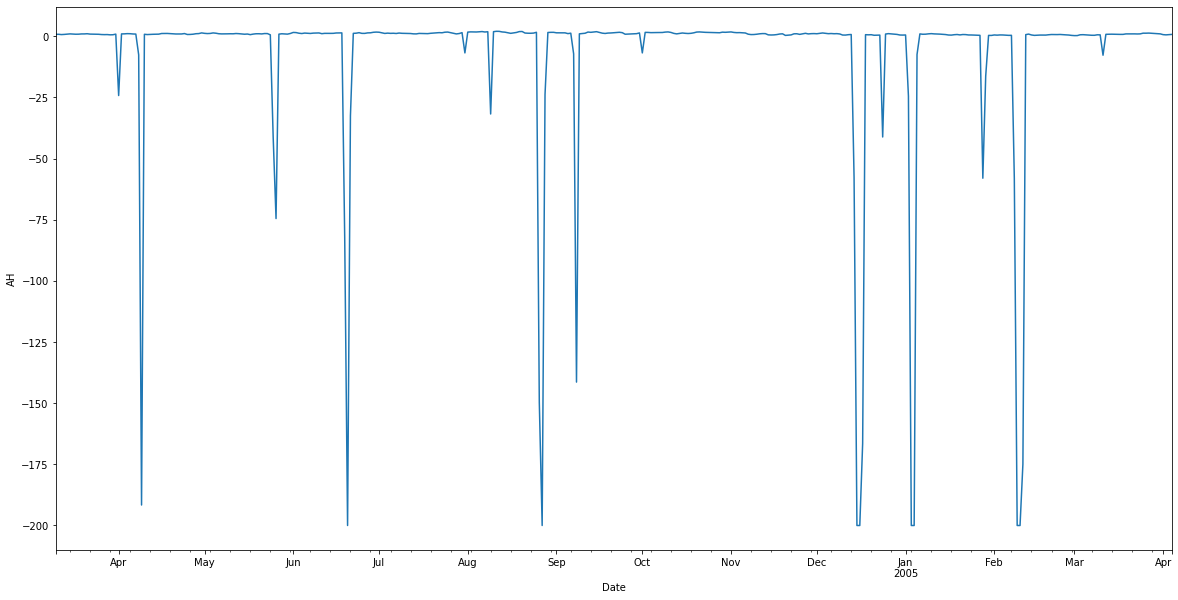

In [3]:
import matplotlib.pyplot as plt
for i in df.columns:

  df[i].plot(figsize=(20,10))

  plt.plot()
  plt.ylabel(i)
  plt.show()

#Simple Moving average

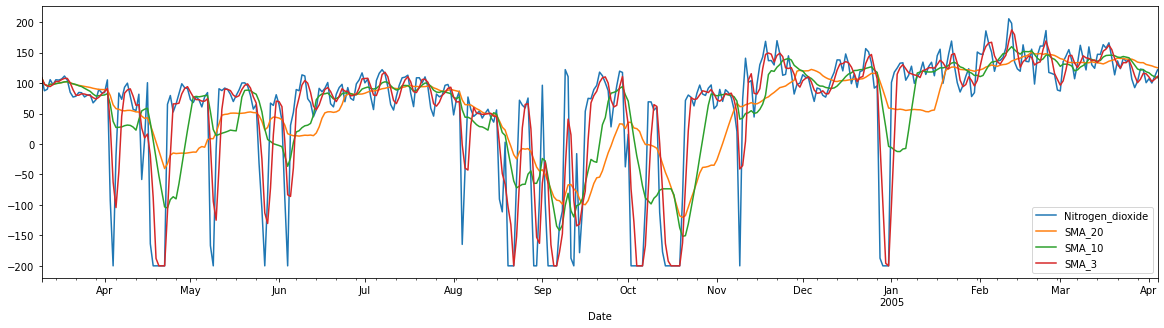

In [4]:
import sklearn.metrics  as metrics
df1=df.Nitrogen_dioxide.copy()
df1=pd.DataFrame(df1)
df1['SMA_20']=df1.Nitrogen_dioxide.rolling(20,min_periods=1).mean()
df1['SMA_10']=df1.Nitrogen_dioxide.rolling(10,min_periods=1).mean()
df1['SMA_3']=df1.Nitrogen_dioxide.rolling(3,min_periods= 1).mean()

df1.plot(figsize=(20,5))

In [5]:
mae=metrics.mean_absolute_error(df['Nitrogen_dioxide'],df1['SMA_20'])
mae

print("MAE for 20 days",round(mae,2))
#################
mae=metrics.mean_absolute_error(df['Nitrogen_dioxide'],df1['SMA_10'])
mae

print("")
print("MAE for 10 days",round(mae,2))


############
mae=metrics.mean_absolute_error(df['Nitrogen_dioxide'],df1['SMA_3'])
mae

print("")
print("MAE for 3 days",round(mae,2))


MAE for 20 days 57.83

MAE for 10 days 51.66

MAE for 3 days 28.32


#Triple Exponential Smoothing

Train set (361, 1)
Test set (30, 1)


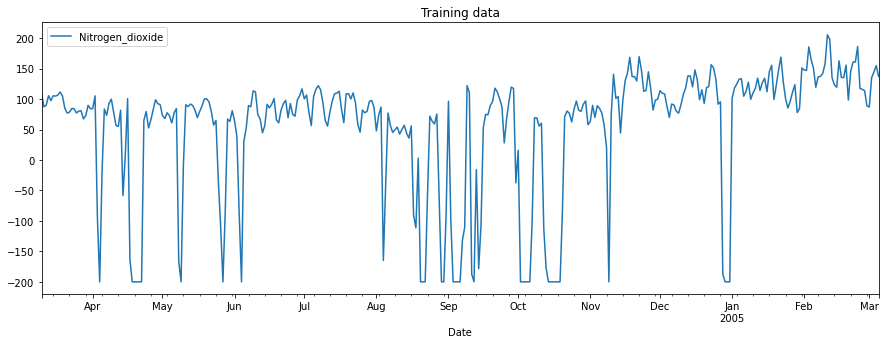

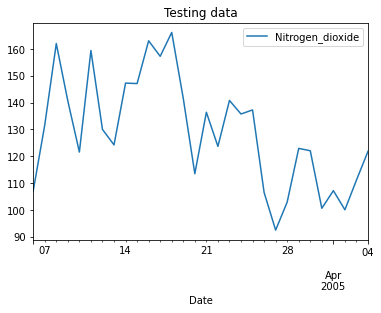

In [6]:
#Triple Exponential Smoothing
df2= df['Nitrogen_dioxide']
train=df2[0:-30]
test=df2[-30:]
train=pd.DataFrame(train)
test=pd.DataFrame(test)
print("Train set",train.shape)
print("Test set",test.shape)
train.plot(title="Training data",figsize=(15,5))
plt.show()
test.plot(title="Testing data")

In [7]:
#Building for loop to find lowest KPI at seasonal period.
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt
pred = test.copy()
mae_temp=300
for i in range(2,100):


  fit1 = ExponentialSmoothing(np.asarray(train['Nitrogen_dioxide']) ,trend='add',seasonal_periods=i , seasonal='add').fit()
  pred['Holt_Winter'] = fit1.forecast(len(test))
  mae = metrics.mean_absolute_error(test.Nitrogen_dioxide, pred.Holt_Winter)
  if mae <mae_temp:

    mae_temp=mae
    print(mae_temp, i)

#For seasonal perriod of 7 has lowest KPI value

22.58057876000893 2
18.70369917021343 3
17.861377689610823 4


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


17.5607036583184 7


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  Conver

MAE 17.56


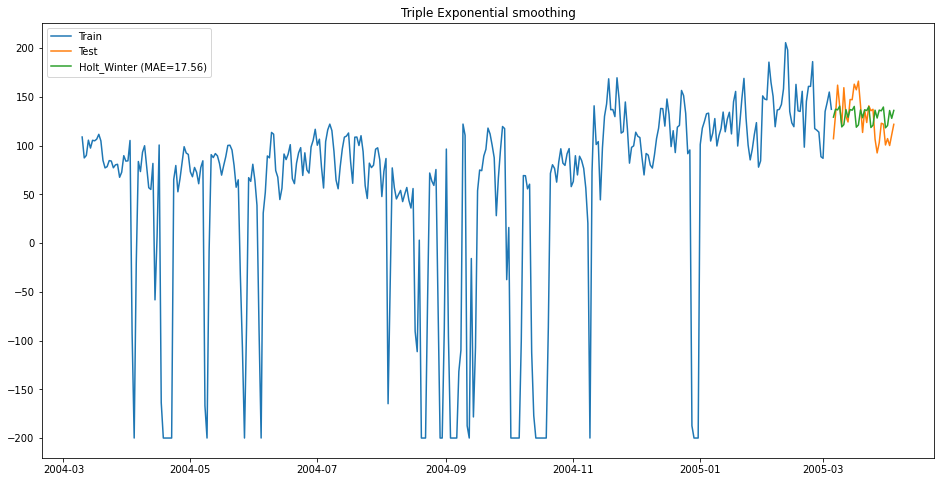

In [8]:

# Fit the model

fit1 = ExponentialSmoothing(np.asarray(train['Nitrogen_dioxide']) ,trend='add',seasonal_periods=7 , seasonal='add').fit()

pred['Holt_Winter'] = fit1.forecast(len(test))
# Calculate KPI's
mae = metrics.mean_absolute_error(test.Nitrogen_dioxide, pred.Holt_Winter)
rmse=sqrt(  metrics.mean_squared_error(test.Nitrogen_dioxide, pred.Holt_Winter))
print("MAE {:,.2f}".format(mae))

# Plot
plt.figure(figsize=(16,8))
plt.plot( train['Nitrogen_dioxide'], label='Train')
plt.plot(test['Nitrogen_dioxide'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (MAE={:.2f})'.format(mae))
plt.title("Triple Exponential smoothing")
plt.legend()
plt.show() 

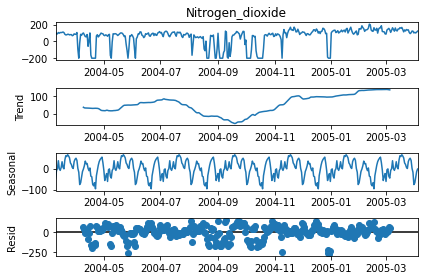

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Perform Additive decompose
decomp=seasonal_decompose(df['Nitrogen_dioxide'],freq=60,model='additive')
decomp.plot()
plt.show()

#ARIMA

In [10]:
#Perform Dickey Fuller test for stationariity
#H0 : Data set is not stationary
#H1 : Dataset is stationary
from statsmodels.tsa.stattools import adfuller


result=adfuller(df['Nitrogen_dioxide'])
print(result)
print("")
print("From the results as shown above with p value <0.05 and zeroth value is less  than 5% "+
 "the above data is stationary Hence we can  perform ARIMA")

(-3.9628574601631037, 0.00161798778609925, 6, 384, {'1%': -3.4474946672686824, '5%': -2.8690962436986855, '10%': -2.570795299750434}, 4147.079308054864)

From the results as shown above with p value <0.05 and zeroth value is less  than 5% the above data is stationary Hence we can  perform ARIMA


# Grid search method to find best trend parameters in Arima

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Create empty list to store result
order_aic_bic=[]
#Loopover p values from 0 to 2
for p in range(3):
  # Loop over q values from 0-2
  for q in range(3):
    try:
      #create arima pdq model
      model=SARIMAX(df['Nitrogen_dioxide'],order=(p,0,q),trend='c')
      results=model.fit()
      #Append order and results
      order_aic_bic.append((p,q,results.aic,results.bic))
    except:
      print(p,q,None,None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [12]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q          AIC          BIC
7  2  1  4337.385833  4357.229371
8  2  2  4338.388504  4362.200750
5  1  2  4338.741695  4358.585233
4  1  1  4346.162626  4362.037457
6  2  0  4349.248218  4365.123049
3  1  0  4352.570986  4364.477108
2  0  2  4401.430488  4417.305318
1  0  1  4447.824182  4459.730304
0  0  0  4724.364153  4732.301568
   p  q          AIC          BIC
7  2  1  4337.385833  4357.229371
5  1  2  4338.741695  4358.585233
4  1  1  4346.162626  4362.037457
8  2  2  4338.388504  4362.200750
3  1  0  4352.570986  4364.477108
6  2  0  4349.248218  4365.123049
2  0  2  4401.430488  4417.305318
1  0  1  4447.824182  4459.730304
0  0  0  4724.364153  4732.301568


                               SARIMAX Results                                
Dep. Variable:       Nitrogen_dioxide   No. Observations:                  391
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -2170.914
Date:                Mon, 12 Apr 2021   AIC                           4349.827
Time:                        01:34:07   BIC                           4365.702
Sample:                    03-10-2004   HQIC                          4356.120
                         - 04-04-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2134      0.122      1.750      0.080      -0.026       0.452
ar.L2          0.4836      0.114      4.231      0.000       0.260       0.708
ma.L1          0.7720      0.099      7.814      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


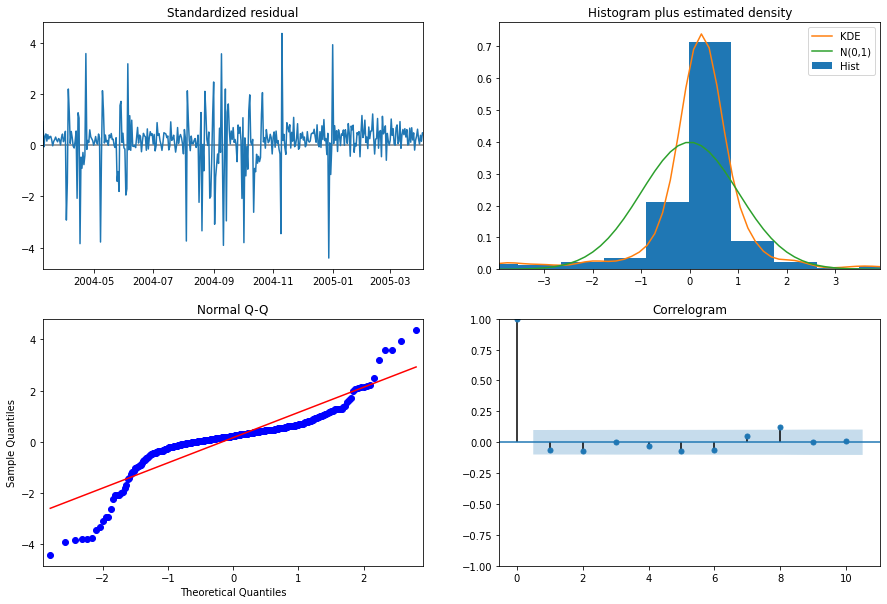

In [13]:
# Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Instantiate the ARIMA model with p =2 , d=0 and q =1
model=SARIMAX(df['Nitrogen_dioxide'],order=(2,0,1))

#Fit the model
results= model.fit()

#print model fir summary
print(results.summary())
results.plot_diagnostics(figsize=(15,10))
plt.show()

MAE of Seasonal Arima 107.20
RMSE of Seasonal Arima 112.97 


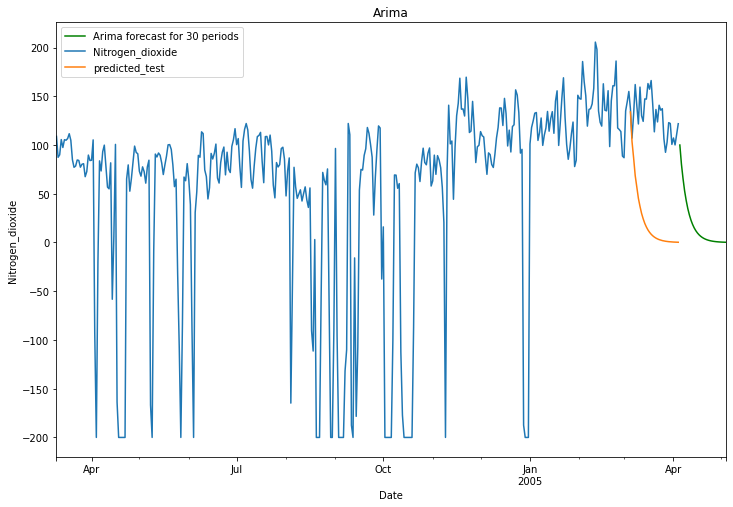

In [14]:
df5= df.copy()
df5['predicted_test']=results.predict(start=360,end=390,dynamic=True)

arima_forecast=pd.DataFrame(results.forecast(len(test)))
arima_forecast=arima_forecast.rename({0:'Arima forecast for 30 periods'}, axis=1)
arima_forecast.plot(figsize=(12,8),color='green')
df5['Nitrogen_dioxide'].plot(figsize=(12,8))
df5['predicted_test'].plot(figsize=(12,8))




plt.ylabel("Nitrogen_dioxide")
plt.title("Arima")
plt.legend()

#Calculate KPI
mae=metrics.mean_absolute_error(df5.Nitrogen_dioxide[360:],df5.predicted_test[360:])
rmse=sqrt(metrics.mean_squared_error(df5.Nitrogen_dioxide[360:],df5.predicted_test[360:]))

print("MAE of Seasonal Arima {:.2f}".format(mae))
print("RMSE of Seasonal Arima {:.2f} ".format(rmse))

In [15]:
#Note :if pmdarim fails to load First uncomment the installation command in this chunk ,  run it then restart run time and comment it back
# Check for seasonal parameters
!pip install pmdarima
#!pip uninstall statsmodels
#!pip install statsmodels==0.11.0
import pmdarima as pm

model_s = pm.auto_arima(df['Nitrogen_dioxide'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=30,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_s.summary())

## What parameters do you get?
#SARIMA for trend order p= 0,d=1,q=0 and seasonal order P=2,D=1,Q=0 gives lowest AIC values of 4857.420 and m (periods)=12 ,thus giving the best model for sarima.

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[30]             : AIC=inf, Time=23.59 sec
 ARIMA(0,1,0)(0,1,0)[30]             : AIC=4306.239, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[30]             : AIC=4232.287, Time=2.59 sec
 ARIMA(0,1,1)(0,1,1)[30]             : AIC=inf, Time=12.28 sec
 ARIMA(1,1,0)(0,1,0)[30]             : AIC=4308.238, Time=0.21 sec
 ARIMA(1,1,0)(2,1,0)[30]             : AIC=4198.312, Time=7.96 sec
 ARIMA(1,1,0)(2,1,1)[30]             : AIC=inf, Time=27.30 sec
 ARIMA(1,1,0)(1,1,1)[30]             : AIC=inf, Time=10.93 sec
 ARIMA(0,1,0)(2,1,0)[30]             : AIC=4196.329, Time=5.93 sec
 ARIMA(0,1,0)(1,1,0)[30]             : AIC=4230.593, Time=1.72 sec
 ARIMA(0,1,0)(2,1,1)[30]             : AIC=inf, Time=22.21 sec
 ARIMA(0,1,0)(1,1,1)[30]             : AIC=inf, Time=6.77 sec
 ARIMA(0,1,1)(2,1,0)[30]             : AIC=4198.297, Time=7.82 sec
 ARIMA(1,1,1)(2,1,0)[30]             : AIC=inf, Time=39.96 sec
 ARIMA(0,1,0)(2,1,0)[30] intercept   : AIC=4198.

In [16]:
# Build the SARIMAXmodel for 30 periods

model = SARIMAX(df['Nitrogen_dioxide'], order=(0, 1, 0), seasonal_order=(2, 1, 0, 30),
                                enforce_stationarity=False,
                                enforce_invertibility=False, dynamic =True)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                   Nitrogen_dioxide   No. Observations:                  391
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 30)   Log Likelihood               -1729.687
Date:                            Mon, 12 Apr 2021   AIC                           3465.374
Time:                                    01:37:24   BIC                           3476.485
Sample:                                03-10-2004   HQIC                          3469.820
                                     - 04-04-2005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L30      -0.5313      0.042    -12.690      0.000      -0.613      -0.449
ar.S.L60      -0.3006      0.042   

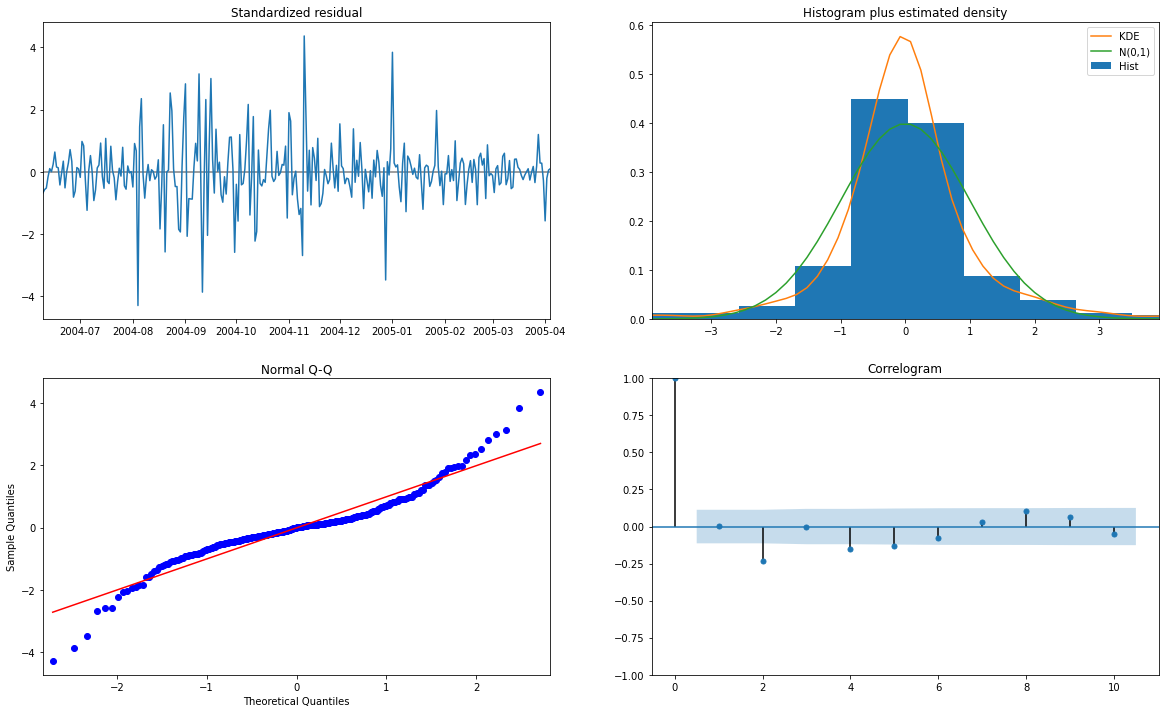

In [17]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(20,12))
plt.show()

MAE of Seasonal Arima 39.45
RMSE of Seasonal Arima 46.20 


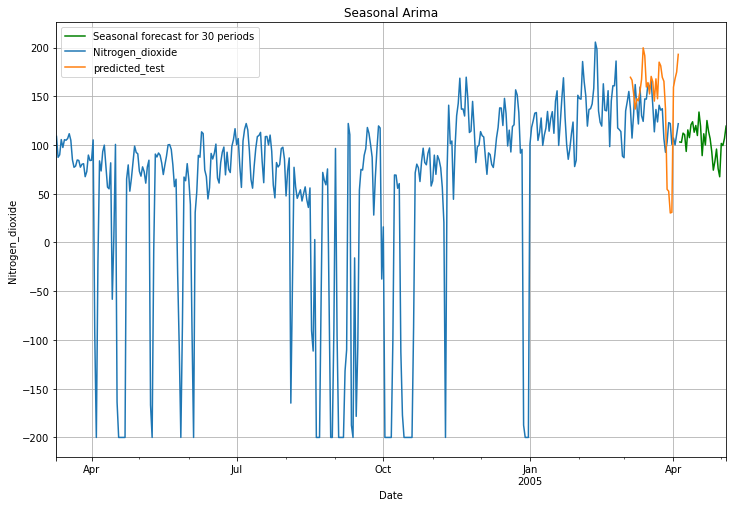

In [18]:
df2= df.copy()
df2['predicted_test']=results.predict(start=360,end=390,dynamic=True)

seasonal_forecast=pd.DataFrame(results.forecast(len(test)))
seasonal_forecast=seasonal_forecast.rename({0:'Seasonal forecast for 30 periods'}, axis=1)
seasonal_forecast.plot(figsize=(12,8),color='green')
df2['Nitrogen_dioxide'].plot(figsize=(12,8))
df2['predicted_test'].plot(figsize=(12,8))




plt.ylabel("Nitrogen_dioxide")
plt.title("Seasonal Arima")
plt.legend()
plt.grid()

#Calculate KPI
mae=metrics.mean_absolute_error(df2.Nitrogen_dioxide[360:],df2.predicted_test[360:])
rmse=sqrt(metrics.mean_squared_error(df2.Nitrogen_dioxide[360:],df2.predicted_test[360:]))

print("MAE of Seasonal Arima {:.2f}".format(mae))
print("RMSE of Seasonal Arima {:.2f} ".format(rmse))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


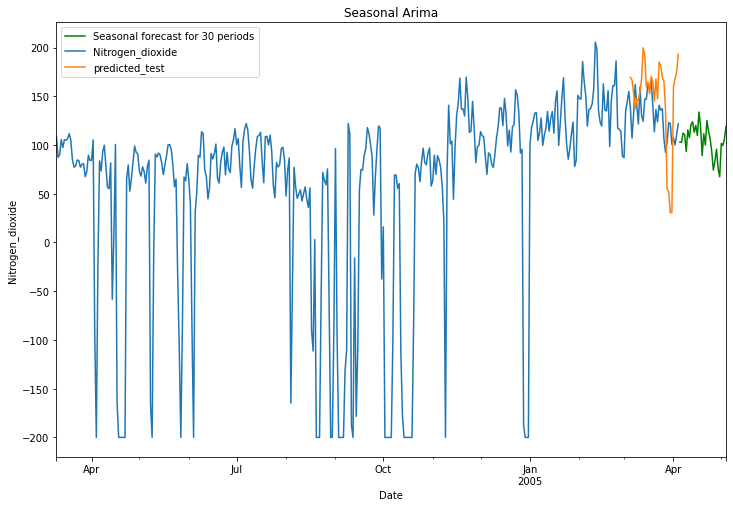

In [19]:
df3 = df.copy()
train = df3[0:-30]
test = df3[-30:]

model = SARIMAX(df3['Nitrogen_dioxide'], order=(0, 1, 0), seasonal_order=(2, 1, 0, 30),
                        enforce_stationarity=False,
                        enforce_invertibility=False, dynamic=True)
results = model.fit()


df3['predicted_test'] = results.predict(start=360, end=390, dynamic=True)

seasonal_forecast = pd.DataFrame(results.forecast(len(test)))
seasonal_forecast = seasonal_forecast.rename({0: 'Seasonal forecast for 30 periods'}, axis=1)
seasonal_forecast.plot(figsize=(12, 8), color='green')
df3['Nitrogen_dioxide'].plot(figsize=(12, 8))
df3['predicted_test'].plot(figsize=(12, 8))

plt.ylabel("Nitrogen_dioxide")
plt.title("Seasonal Arima")
plt.legend()
plt.show()

#Long short term Memory Network

In [20]:


data =df.copy()
data=data.iloc[:,7].values
data.shape

(391,)

In [21]:
data = data.reshape(-1,1)
data
data.dtype

data = data.astype('float32')
data.shape

(391, 1)

In [22]:
# Scaling the data
scalar =MinMaxScaler()
data=scalar.fit_transform(data)
data

array([[0.76144683],
       [0.7085401 ],
       [0.7148067 ],
       [0.7534338 ],
       [0.7334012 ],
       [0.7531256 ],
       [0.7517901 ],
       [0.75600207],
       [0.76822716],
       [0.75158465],
       [0.7024789 ],
       [0.6832681 ],
       [0.68645275],
       [0.7017598 ],
       [0.7006297 ],
       [0.6835763 ],
       [0.690973  ],
       [0.6924112 ],
       [0.6595371 ],
       [0.67237854],
       [0.7141903 ],
       [0.7004243 ],
       [0.7011434 ],
       [0.752612  ],
       [0.26473942],
       [0.        ],
       [0.44287607],
       [0.6994997 ],
       [0.67402226],
       [0.7228198 ],
       [0.73935956],
       [0.68676096],
       [0.6331351 ],
       [0.62882036],
       [0.6945686 ],
       [0.34949303],
       [0.50934345],
       [0.74120873],
       [0.08947927],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.65388685],
       [0.68932927],
       [0.6228619 ],
       [0.655

In [23]:
train_lstm=data[:-30,:]
test_lstm=data[-30:,:]


In [24]:
# Building the 2D array for supervised learning
def create_dataset(sequence, time_step):
    dataX = []
    dataY = []
    for i in range(len(sequence)-time_step-1):
        a = sequence[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(sequence[i + time_step, 0])
    return np.array(dataX),  np.array(dataY)

In [25]:
time_step = 1
# Apply the 2D array function to train and test datasets
train_X, train_Y = create_dataset(train_lstm,time_step)
test_X, test_Y =create_dataset(test_lstm, time_step)

In [26]:
#converting 2d arry to 3d array
train_X = np.reshape(train_X, (train_X.shape[0],1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
test_X.shape

(28, 1, 1)

In [27]:
# Build the LSTM Model with 3 layers
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(50, activation= 'relu', input_shape =(1, time_step),return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
model.fit(train_X, train_Y, batch_size=4, epochs =50, verbose=2)

Epoch 1/50
90/90 - 34s - loss: 0.1943
Epoch 2/50
90/90 - 1s - loss: 0.0404
Epoch 3/50
90/90 - 1s - loss: 0.0343
Epoch 4/50
90/90 - 1s - loss: 0.0315
Epoch 5/50
90/90 - 1s - loss: 0.0289
Epoch 6/50
90/90 - 1s - loss: 0.0286
Epoch 7/50
90/90 - 1s - loss: 0.0285
Epoch 8/50
90/90 - 1s - loss: 0.0286
Epoch 9/50
90/90 - 1s - loss: 0.0297
Epoch 10/50
90/90 - 1s - loss: 0.0280
Epoch 11/50
90/90 - 1s - loss: 0.0292
Epoch 12/50
90/90 - 1s - loss: 0.0281
Epoch 13/50
90/90 - 1s - loss: 0.0278
Epoch 14/50
90/90 - 1s - loss: 0.0277
Epoch 15/50
90/90 - 1s - loss: 0.0284
Epoch 16/50
90/90 - 1s - loss: 0.0284
Epoch 17/50
90/90 - 1s - loss: 0.0271
Epoch 18/50
90/90 - 1s - loss: 0.0287
Epoch 19/50
90/90 - 1s - loss: 0.0281
Epoch 20/50
90/90 - 1s - loss: 0.0271
Epoch 21/50
90/90 - 1s - loss: 0.0273
Epoch 22/50
90/90 - 1s - loss: 0.0279
Epoch 23/50
90/90 - 1s - loss: 0.0277
Epoch 24/50
90/90 - 1s - loss: 0.0278
Epoch 25/50
90/90 - 1s - loss: 0.0276
Epoch 26/50
90/90 - 1s - loss: 0.0276
Epoch 27/50
90/90 - 

In [28]:
# Make predictions
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_Y = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_Y = scalar.inverse_transform([test_Y])
# calculate root mean squared error
train_score = mean_absolute_error(train_Y[0], train_predict[:,0])
print('Train Score: %.3f MAE' % (train_score))
test_score = mean_absolute_error(test_Y[0], test_predict[:,0])
print('Test Score: %.3f MAE' % (test_score))

Train Score: 44.395 MAE
Test Score: 25.799 MAE


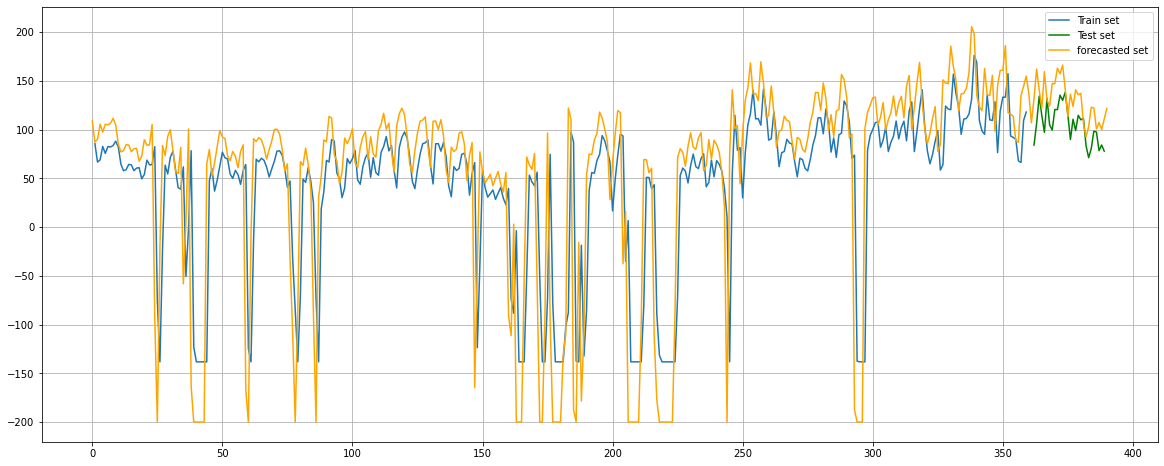

In [29]:
# shifting train
train_plot = np.empty_like(data) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict)+time_step, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(data)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_step*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,8))
plt.plot(train_plot)
plt.plot(test_plot,color='green')
plt.plot(scalar.inverse_transform(data),color='orange')
plt.grid()
plt.legend(labels=['Train set','Test set', 'forecasted set'])

plt.show()

In [30]:
test_predict=scalar.fit_transform(test_predict)
test_predict

array([[0.19239593],
       [0.52275014],
       [0.94211304],
       [0.645489  ],
       [0.38649368],
       [0.90571284],
       [0.5007051 ],
       [0.42248952],
       [0.73710775],
       [0.73474824],
       [0.95634687],
       [0.8756652 ],
       [1.0000001 ],
       [0.6580199 ],
       [0.2781155 ],
       [0.5878931 ],
       [0.41494596],
       [0.64806294],
       [0.578894  ],
       [0.5996902 ],
       [0.1850872 ],
       [0.        ],
       [0.13768601],
       [0.40498602],
       [0.39301097],
       [0.1070056 ],
       [0.19405675],
       [0.09963489]], dtype=float32)

In [31]:
time_step=10

x_input=test_predict[(len(test_predict)-time_step):].reshape(1,-1)
x_input


array([[0.578894  , 0.5996902 , 0.1850872 , 0.        , 0.13768601,
        0.40498602, 0.39301097, 0.1070056 , 0.19405675, 0.09963489]],
      dtype=float32)

In [32]:
#Converting it to list
temp_input=list(x_input)
#Arranging list vertically
temp_input=temp_input[0].tolist()
temp_input

[0.5788940191268921,
 0.5996901988983154,
 0.1850872039794922,
 0.0,
 0.13768601417541504,
 0.40498602390289307,
 0.3930109739303589,
 0.10700559616088867,
 0.19405674934387207,
 0.09963488578796387]

In [33]:

#demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
future_day=10
n_steps=10
i=0
#Forcast next 10 days output
while(i<future_day):

  if(len(temp_input) >10):

    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    #Converting to 3d array for lstm
    x_input=x_input.reshape(1,n_steps,1)
    #print(x_input)
    ypred=model.predict(x_input,verbose=0)
    print("{} day predicted output {}".format(i,ypred))
    #adding predicted output  to temp_input list
    temp_input.extend(ypred[0].tolist())
    temp_input=temp_input[1:]

    #print(temp_input)
    lst_output.extend(ypred.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((n_steps,1,1))
    ypred=model.predict(x_input,verbose=0)
    print("Predicted y of 0 day",ypred[0])
    #Addding ypred value in temp_input(previous input)
    temp_input.extend(ypred[0].tolist())
    print(len(temp_input))
    lst_output.extend(ypred.tolist())
    i=i+1

print(lst_output)




Predicted y of 0 day [0.5473472]
11
1 day input [0.5996902  0.1850872  0.         0.13768601 0.40498602 0.39301097
 0.1070056  0.19405675 0.09963489 0.54734719]
1 day predicted output [[4.260585]]
2 day input [0.1850872  0.         0.13768601 0.40498602 0.39301097 0.1070056
 0.19405675 0.09963489 0.54734719 4.26058483]
2 day predicted output [[5.8028]]
3 day input [0.         0.13768601 0.40498602 0.39301097 0.1070056  0.19405675
 0.09963489 0.54734719 4.26058483 5.80280018]
3 day predicted output [[7.0359693]]
4 day input [0.13768601 0.40498602 0.39301097 0.1070056  0.19405675 0.09963489
 0.54734719 4.26058483 5.80280018 7.03596926]
4 day predicted output [[7.5452137]]
5 day input [0.40498602 0.39301097 0.1070056  0.19405675 0.09963489 0.54734719
 4.26058483 5.80280018 7.03596926 7.5452137 ]
5 day predicted output [[7.727389]]
6 day input [0.39301097 0.1070056  0.19405675 0.09963489 0.54734719 4.26058483
 5.80280018 7.03596926 7.5452137  7.72738886]
6 day predicted output [[7.789864]]

In [34]:
#Experiment
previous_days1=np.arange(len(df)-n_steps,len(df))
predicted_future1=np.arange(len(df),len(df)+future_day)
print(previous_days1)
print(predicted_future1)


[381 382 383 384 385 386 387 388 389 390]
[391 392 393 394 395 396 397 398 399 400]


In [35]:
lst_output=lst_output[:future_day]

In [36]:
outputlist=data.tolist()
outputlist.extend(lst_output)
data[len(data)-n_steps:]
len(lst_output)

10

In [37]:
#len(outputlist[len(df1)-n_steps:])
len(outputlist)

401

In [38]:
previous_days=np.arange(1,time_step+1)
predicted_future=np.arange(time_step+1,future_day+ time_step+1)
print(predicted_future)


#Experiment
previous_days=np.arange(len(data)-time_step,len(data))
predicted_future=np.arange(len(data),len(data)+future_day-1)
print(previous_days)
print(predicted_future)

[11 12 13 14 15 16 17 18 19 20]
[381 382 383 384 385 386 387 388 389 390]
[391 392 393 394 395 396 397 398 399]


Text(0, 0.5, 'Nitorgen dioxide level')

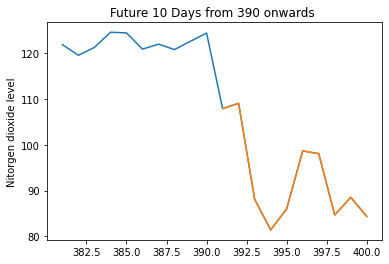

In [39]:
plt.plot(np.append(previous_days1,predicted_future1),scalar.inverse_transform(outputlist[len(df)-n_steps:]))
plt.plot(predicted_future1,scalar.inverse_transform(lst_output))
plt.title('Future 10 Days from 390 onwards ')
plt.ylabel('Nitorgen dioxide level')

The above graph is the outof sample forecast for future 10 days using Lstm model

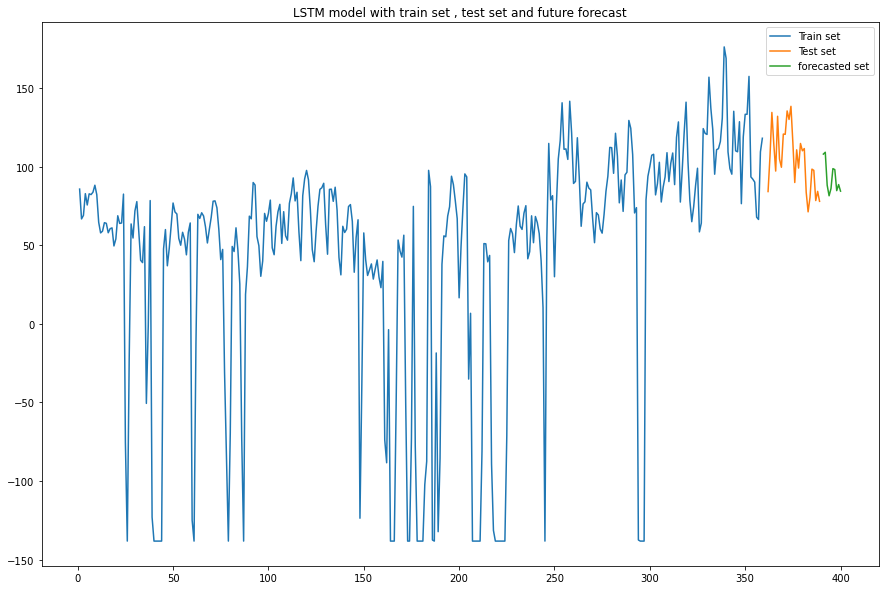

In [40]:
#plt.plot(np.append(previous_days1,predicted_future1),scalar.inverse_transform(outputlist[len(df1)-n_steps:]))
plt.figure(figsize=(15,10))
plt.plot(train_plot)
plt.plot(test_plot)
plt.plot(predicted_future1,scalar.inverse_transform(lst_output))


plt.title('LSTM model with train set , test set and future forecast')
plt.legend(labels=['Train set','Test set', 'forecasted set'])


#Machine Learning

In [41]:
df55=df.Nitrogen_dioxide.copy()
df55=pd.DataFrame(df55)

In [42]:
df55.head(2)

,Nitrogen_dioxide
Date,
2004-03-10,108.833333
2004-03-11,87.375000


In [43]:
# reframe as supervised learning
# lab observation (t-1) is the input variable and t is the output variable.
dfML = pd.DataFrame()
print(dfML)

Empty DataFrame
Columns: []
Index: []


In [44]:
# Create 7 days of lag values to predict current observation
# Shift of 7 days in this case
for i in range(7,0,-1):
    dfML[['t-'+str(i)]] = df55.shift(i)
print(dfML)

                   t-7         t-6  ...         t-2         t-1
Date                                ...                        
2004-03-10         NaN         NaN  ...         NaN         NaN
2004-03-11         NaN         NaN  ...         NaN  108.833333
2004-03-12         NaN         NaN  ...  108.833333   87.375000
2004-03-13         NaN         NaN  ...   87.375000   89.916667
2004-03-14         NaN         NaN  ...   89.916667  105.583333
...                ...         ...  ...         ...         ...
2005-03-31  135.758333  137.279167  ...  122.954167  122.066667
2005-04-01  137.279167  106.533333  ...  122.066667  100.637500
2005-04-02  106.533333   92.500000  ...  100.637500  107.208333
2005-04-03   92.500000  102.958333  ...  107.208333  100.079167
2005-04-04  102.958333  122.954167  ...  100.079167  111.137500

[391 rows x 7 columns]


In [45]:
# Create column t (original column)
dfML['t'] = df55.values
print(dfML.head(12))

                   t-7         t-6  ...         t-1           t
Date                                ...                        
2004-03-10         NaN         NaN  ...         NaN  108.833333
2004-03-11         NaN         NaN  ...  108.833333   87.375000
2004-03-12         NaN         NaN  ...   87.375000   89.916667
2004-03-13         NaN         NaN  ...   89.916667  105.583333
2004-03-14         NaN         NaN  ...  105.583333   97.458333
2004-03-15         NaN         NaN  ...   97.458333  105.458333
2004-03-16         NaN  108.833333  ...  105.458333  104.916667
2004-03-17  108.833333   87.375000  ...  104.916667  106.625000
2004-03-18   87.375000   89.916667  ...  106.625000  111.583333
2004-03-19   89.916667  105.583333  ...  111.583333  104.833333
2004-03-20  105.583333   97.458333  ...  104.833333   84.916667
2004-03-21   97.458333  105.458333  ...   84.916667   77.125000

[12 rows x 8 columns]


In [46]:
# Create a new subsetted dataframe, removing Nans from first 24 rows
df_ML = dfML[7:]
print(df_ML)

                   t-7         t-6  ...         t-1           t
Date                                ...                        
2004-03-17  108.833333   87.375000  ...  104.916667  106.625000
2004-03-18   87.375000   89.916667  ...  106.625000  111.583333
2004-03-19   89.916667  105.583333  ...  111.583333  104.833333
2004-03-20  105.583333   97.458333  ...  104.833333   84.916667
2004-03-21   97.458333  105.458333  ...   84.916667   77.125000
...                ...         ...  ...         ...         ...
2005-03-31  135.758333  137.279167  ...  122.066667  100.637500
2005-04-01  137.279167  106.533333  ...  100.637500  107.208333
2005-04-02  106.533333   92.500000  ...  107.208333  100.079167
2005-04-03   92.500000  102.958333  ...  100.079167  111.137500
2005-04-04  102.958333  122.954167  ...  111.137500  121.840000

[384 rows x 8 columns]


In [47]:
df_ML.shape

(384, 8)

In [48]:
df_ML.head()

,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
Date,,,,,,,,
2004-03-17,108.833333,87.375000,89.916667,105.583333,97.458333,105.458333,104.916667,106.625000
2004-03-18,87.375000,89.916667,105.583333,97.458333,105.458333,104.916667,106.625000,111.583333
2004-03-19,89.916667,105.583333,97.458333,105.458333,104.916667,106.625000,111.583333,104.833333
2004-03-20,105.583333,97.458333,105.458333,104.916667,106.625000,111.583333,104.833333,84.916667
2004-03-21,97.458333,105.458333,104.916667,106.625000,111.583333,104.833333,84.916667,77.125000


In [49]:
# Split Data into dependent(target) and independent(features) variables

df_ML22 = df_ML.values
# Lagged variables (features) and original time series data (target)
X2= df_ML22[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y2 = df_ML22[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [50]:
# Columns t-1 to t-7, which are the lagged variables
print('X2', X2.shape)
print('y2', y2.shape)

X2 (384, 7)
y2 (384,)


In [51]:
# Target(Y) Train-Test split

Y2 = y2
traintarget_size = int(len(Y2) * 0.70)   # Set split 80 20
print(traintarget_size)
train_target, test_target = Y2[:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y2)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

268
Observations for Target: 384
Training Observations for Target: 268
Testing Observations for Target: 116


In [52]:
# Features(X) Train-Test split

trainfeature_size = int(len(X2) * 0.70)
train_feature, test_feature = X2[:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 384
Training Observations for feature: 268
Testing Observations for feature: 116


In [53]:
train_feature

array([[108.83333333,  87.375     ,  89.91666667, ...,  97.45833333,
        105.45833333, 104.91666667],
       [ 87.375     ,  89.91666667, 105.58333333, ..., 105.45833333,
        104.91666667, 106.625     ],
       [ 89.91666667, 105.58333333,  97.45833333, ..., 104.91666667,
        106.625     , 111.58333333],
       ...,
       [ 99.75      , 113.75      , 109.58333333, ...,  87.875     ,
         69.91666667,  91.91666667],
       [113.75      , 109.58333333, 108.25      , ...,  69.91666667,
         91.91666667,  90.20833333],
       [109.58333333, 108.25      ,  87.875     , ...,  91.91666667,
         90.20833333,  79.95833333]])

##Linear Regression  Model

In [54]:
## Linear Regression  Model
from sklearn.linear_model import LinearRegression
  
reg = LinearRegression() # Create a linear regression object
  
reg = reg.fit(train_feature, train_target) # Fit it to the training data
  
# Create two predictions for the training and test sets
train_prediction = reg.predict(train_feature)
test_prediction = reg.predict(test_feature)



lr_train_score_70_30=reg.score(train_feature,train_target)
lr_test_score_70_30=reg.score(test_feature,test_target)
print("LinearRegression on train score 70 30:", round(lr_train_score_70_30*100,1))
print("LinearRegression on test score 70 30:", round(lr_test_score_70_30*100,1))
print("")

LinearRegression on train score 70 30: 59.3
LinearRegression on test score 70 30: 48.6



In [55]:
# Compute the MAE for both the training and test sets

MAE_lr_train_70_30=np.mean(abs(train_target-train_prediction))
print("LinearRegression on train set MAE%:", round(MAE_lr_train_70_30*100,1))

MAE_lr_test_70_30=np.mean(abs(test_target-test_prediction))
print("LinearRegression on test set MAE%:", round(MAE_lr_test_70_30*100,1))

from sklearn.metrics import mean_absolute_error
MAE_train=mean_absolute_error(train_target,train_prediction)
round(MAE_train*100,1)

LinearRegression on train set MAE%: 4265.4
LinearRegression on test set MAE%: 3054.0


4265.4

In [56]:
train_target.shape

(268,)

#Decision Tree Model 

In [57]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()  # max_depth not set

# Fit the model to the training features and targets
decision_tree.fit(train_feature, train_target)

# Check the score on train and test
print("Decision Tree training score",round(decision_tree.score(train_feature, train_target),2))
print("Decision Tree test score",round(decision_tree.score(test_feature,test_target),2))       # predictions are horrible if negative value, no relationship if 0


Decision Tree training score 1.0
Decision Tree test score 0.06


From the above result of Decision tree we can say that it is overfitting on the training set.

In [58]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3,4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=0)
    decision_tree.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("DT train score ",decision_tree.score(train_feature, train_target))
    print("DT test score",decision_tree.score(test_feature, test_target), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below. 

max_depth= 2
DT train score  0.5878196470692371
DT test score 0.17213584474762145 

max_depth= 3
DT train score  0.6975477191326622
DT test score 0.4580186821488579 

max_depth= 4
DT train score  0.7857738972111205
DT test score 0.09200220173510043 

max_depth= 5
DT train score  0.881277499093432
DT test score 0.0979183005533435 

max_depth= 7
DT train score  0.9624447498292461
DT test score 0.08691919177954543 

max_depth= 8
DT train score  0.9785015403514629
DT test score 0.09704641815470649 

max_depth= 10
DT train score  0.9940899357182552
DT test score 0.08225171974074197 



The best max_depth is max_depth that gives the best test score (positive and high). In our case max_depth of 3 is best having a test score of 0.45

Dt train score 70 30 split = 0.7
DT test score 70 30 split = 0.46

Tree on train set MAE%: 3713.9
DEcision tree on test set MAE%: 3116.6


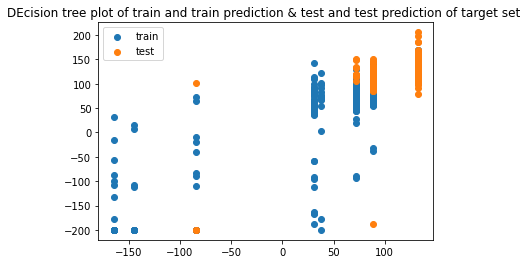

In [59]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree = DecisionTreeRegressor(max_depth=3,random_state=0) # Fill in best max depth score here
decision_tree.fit(train_feature, train_target)


# Check the score on train and test
dt_train_70_30=decision_tree.score(train_feature, train_target)
dt_test_70_30=decision_tree.score(test_feature,test_target)
print("Dt train score 70 30 split =",round(dt_train_70_30,2))
print("DT test score 70 30 split =",round(dt_test_70_30,2))


print("")

# Predict values for train and test
train_prediction = decision_tree.predict(train_feature)

MAE_dt_train_70_30=np.mean(abs(train_target-train_prediction))



print("Tree on train set MAE%:", round(MAE_dt_train_70_30*100,1))


test_prediction = decision_tree.predict(test_feature)

MAE_dt_test_70_30=np.mean(abs(test_target-test_prediction))
print("DEcision tree on test set MAE%:", round(MAE_dt_test_70_30*100,1))

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  
plt.legend()
plt.title("DEcision tree plot of train and train prediction & test and test prediction of target set ")

plt.show()


#Random Forest Model 

In [60]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200,random_state=10)
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print("Random forest train score",rfr.score(train_feature, train_target))
print("Random forest test score",rfr.score(test_feature, test_target)) 
 # Try to attain a positive value

Random forest train score 0.9367675001469856
Random forest test score 0.40585619707855736


In [61]:
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, but also takes longer it will take to compute. 
# Run grid search
grid = {'n_estimators': [100,200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [1,2, 3, 4], 'random_state': [10,20,13]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  

# The best test score

0.4225052240689764 {'random_state': 20, 'n_estimators': 200, 'max_features': 4, 'max_depth': 7}


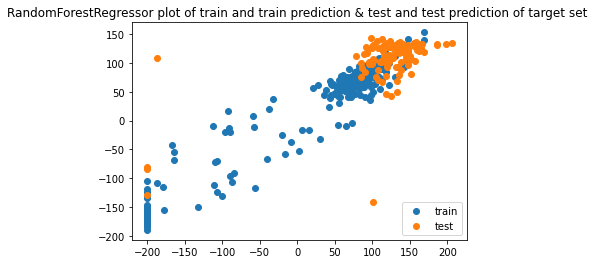

In [62]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=7, max_features = 4, random_state=13)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature) #X_train
test_prediction = rfr.predict(test_feature) #X_test

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.title("RandomForestRegressor plot of train and train prediction & test and test prediction of target set ")

plt.show()

In [63]:
# Compute the MAE for both the training and test sets

# Look at the R^2 scores on train and test
rfr_train_70_30 =rfr.score(train_feature, train_target)
rfr_test_70_30 =rfr.score(test_feature, test_target)
print("Train score of random forest 70 30 split =",round(rfr_train_70_30,2) )
print("Test score of random forest 70 30 split =",round(rfr_test_70_30,2)) 

print("")
MAE_rfr_train_70_30=np.mean(abs(train_target-train_prediction))
print("Random forest on train set MAE%:", round(MAE_rfr_train_70_30*100,1))

MAE_rfr_test_70_30=np.mean(abs(test_target-test_prediction))
print("Random forest on test set MAE%:", round(MAE_rfr_test_70_30*100,1))

Train score of random forest 70 30 split = 0.91
Test score of random forest 70 30 split = 0.4

Random forest on train set MAE%: 2220.8
Random forest on test set MAE%: 3161.3


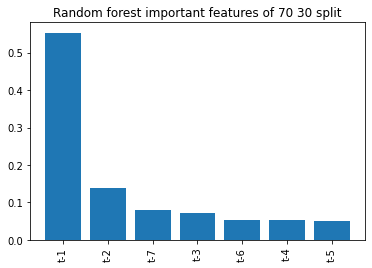

In [64]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-7','t-6','t-5','t-4', 't-3', 't-2', 't-1']
      
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.title("Random forest important features of 70 30 split")
plt.show()

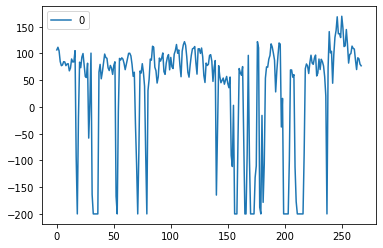

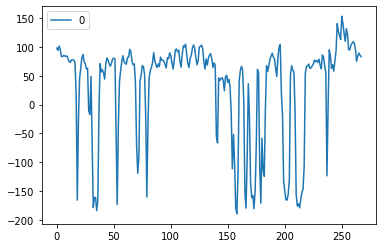

In [65]:
plot_data=rfr.predict(train_feature)
predicted_rfr=pd.DataFrame(plot_data)
#predicted_gbr.plot()
y_true=pd.DataFrame(train_target)
y_true.plot()
predicted_rfr.plot()

#Gradient Boosted Tree Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#Applying grid search on Gradient boosting Reegressor
grid = {'learning_rate': [0.1,0.01,0.001],'n_estimators':[100,200,300,400,500], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [1,2, 3, 4], 'random_state': [10,50,100],'subsample':[0.3,0.6,0.8,1]}
test_scores = []
gbr=GradientBoostingRegressor()
# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    gbr.set_params(**g)  # ** is "unpacking" the dictionary
    gbr.fit(train_feature, train_target)
    test_scores.append(gbr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx]) 

In [ ]:
# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model --  from the above grid search hyperparameters 


gbr = GradientBoostingRegressor(max_features=3,
                                max_depth=2,
                                learning_rate=0.1,
                                n_estimators=100,
                                subsample=0.8,
                                random_state=50)

gbr.fit(train_feature, train_target)

gbr_train_70_30=gbr.score(train_feature, train_target)
gbr_test_70_30=gbr.score(test_feature, test_target)
print("Gradient boosting training score ",round(gbr_train_70_30 ,2))
print("Gradient boosting test score",round(gbr_test_70_30,2))

In [ ]:
# Make predictions with our model
train_prediction = gbr.predict(train_feature)
test_prediction = gbr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.title("Gradient boosting plot of train and train prediction & test and test prediction of target set ")
plt.show()

In [ ]:
# Compute the MAE for both the training and test sets

MAE_train_gbr_70_30=np.mean(abs(train_target-train_prediction))
print("Graient Boosting Regressor on train set MAE%:", round(MAE_train_gbr_70_30*100,1))

MAE_test_gbr_70_30=np.mean(abs(test_target-test_prediction))
print("Graient Boosting Regressor on train set MAE%:", round(MAE_test_gbr_70_30*100,1))

In [ ]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x2 = range(X2.shape[1])

# Create tick labels 
feature_names = ['t-7','t-6','t-5','t-4', 't-3','t-2', 't-1']
       
labels = np.array(feature_names)[sorted_index]

plt.bar(x2, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_70_30 = {'Model': ['Linear Regression','Decision Tree','Random_forest','Gradient_Boosting'], 'Train_score': [lr_train_score_70_30, dt_train_70_30,rfr_train_70_30,gbr_train_70_30],
            'Test_score':[lr_test_score_70_30,dt_test_70_30,rfr_test_70_30,gbr_test_70_30], 
            'MAE_train': [MAE_lr_train_70_30, MAE_dt_train_70_30 ,MAE_rfr_train_70_30,MAE_train_gbr_70_30 ],'MAE_test': [MAE_lr_test_70_30, MAE_dt_test_70_30 ,MAE_rfr_test_70_30,MAE_test_gbr_70_30 ]
            }
df_70_30_comparision = pd.DataFrame(data=df_70_30)

df_70_30_comparision.MAE_test= df_70_30_comparision['MAE_test']*100
df_70_30_comparision.MAE_train= df_70_30_comparision['MAE_train']*100


df_70_30_comparision[['Train_score','Test_score','MAE_train','MAE_test']]=round(df_70_30_comparision[['Train_score','Test_score','MAE_train','MAE_test']],2)

df_70_30_comparision

From the above analysis of machine learning model  we see that Gradient boosting is our benchmark model with highest test accuracy and lowest MAE_test values when compared to all the techniques. 

The Second best model is Linear Regression with a test_score of 0.49 and MAE_test of 3053.

In [ ]:
plot_test_pred=gbr.predict(test_feature)
plot_test_pred=pd.DataFrame(plot_test_pred)
plot_test_pred=plot_test_pred.rename({0:'Predicted_test'},axis=1)

plot_test_target=pd.DataFrame(test_target)
plot_test_target=plot_test_target.rename({0:'Actual_test'},axis=1)
gbr_test_plot=pd.concat([plot_test_target,plot_test_pred],axis=1)

gbr_test_plot.plot(title='Gradient boosting Actual vs Predicted test of last 30 days')


The above plot pictures the test values and predicted values by our gradient boosting model. 

In [ ]:
gbr_test_plot[106:].plot(title='Plot of last 10 days')
plt.grid()

Vistualization of the Actual test values and predicted values for the last 10 days

#Comparison between most significant feature t-1 , least significant feature t-6 with predicted test 

In [ ]:
test_imp_feature=pd.DataFrame(test_feature)
test_imp_feature=test_imp_feature.rename({6:"t-1"},axis=1)
test_imp_feature["t-1"].plot()
plt.legend()

In [ ]:
test_imp_feature=pd.DataFrame(test_feature)
test_imp_feature=test_imp_feature.rename({1:"t-6"},axis=1)
test_imp_feature['t-6'].plot()

Hence by summarizing the entire analysis done so far LSTM model performed best with Lowest MAE value of **16.17** when compared with all the forecasting models